In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Data/Almond_world_data.csv")
df.head()

,Area,Year,Area harvested (ha),Production (t),Yield (kg/ha)
0,Australia and New Zealand,1980,1430.0,3500.0,2447.6
1,Australia and New Zealand,1981,1450.0,3250.0,2241.4
2,Australia and New Zealand,1982,1480.0,3450.0,2331.1
3,Australia and New Zealand,1983,1560.0,3600.0,2307.7
4,Australia and New Zealand,1984,1700.0,3700.0,2176.5


# Explore dataset variables

In [4]:
df.describe(
    include="all"
).T  # .fillna('—') # THis is called an em dash, you can write it by holdng Alt + 0151

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Area,909,17,World,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,909.0,NaN,NaN,NaN,1994.188119,17.977495,1961.0,1979.0,1995.0,2010.0,2023.0
Area harvested (ha),784.0,NaN,NaN,NaN,231623.258929,429250.540436,0.0,3182.75,26915.5,213663.25,2322710.0
Production (t),909.0,NaN,NaN,NaN,228636.163256,530218.041363,0.0,2150.0,25300.0,190906.0,4175682.93
Yield (kg/ha),759.0,NaN,NaN,NaN,1780.486825,1468.357245,138.3,707.15,1432.6,2158.5,9318.5


In [5]:
df.Area.unique(), df.Area.nunique()

(array(['Australia and New Zealand', 'Central America', 'Central Asia',
        'Eastern Asia', 'Eastern Europe', 'Northern Africa',
        'Northern America', 'Northern Europe', 'Oceania', 'South America',
        'Southern Africa', 'Southern Asia', 'Southern Europe',
        'Western Africa', 'Western Asia', 'Western Europe', 'World'],
       dtype=object),
 17)

In [6]:
# let's get a subset of the dataset for World data only
dfw = df[df.Area == "World"]
dfw=dfw.drop(columns=['Area'])
dfw

,Year,Area harvested (ha),Production (t),Yield (kg/ha)
846,1961,734703.0,756588.00,1029.8
847,1962,753026.0,436538.00,579.7
848,1963,738654.0,577518.00,781.9
849,1964,781827.0,631599.00,807.9
850,1965,789828.0,605077.00,766.1
...,...,...,...,...
904,2019,2141132.0,3584078.52,1673.9
905,2020,2176015.0,4175682.93,1919.0
906,2021,2251942.0,4033098.22,1790.9
907,2022,2322710.0,3640790.38,1567.5


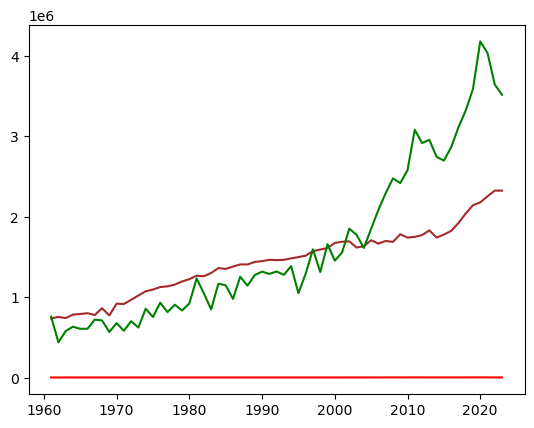

In [7]:
# Plotting the world data

# The semicolon removes unnecessary output of matplotlib, make sure to place it at the last plt statemnt
plt.plot(dfw.Year, dfw["Area harvested (ha)"], "brown")
plt.plot(dfw.Year, dfw["Production (t)"], "green")
plt.plot(dfw.Year, dfw["Yield (kg/ha)"], "red")
# <== like here

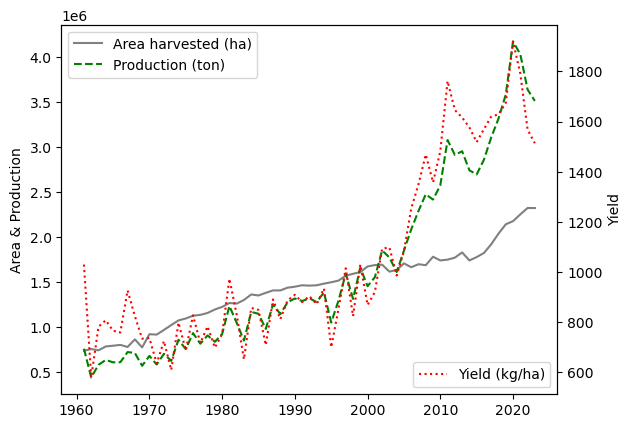

In [8]:
# Improving the plot
fig, ax1 = plt.subplots()
ax1.plot(dfw.Year, dfw["Area harvested (ha)"], "grey", label="Area harvested (ha)")
ax1.plot(
    dfw.Year, dfw["Production (t)"], "green", linestyle="--", label="Production (ton)"
)
ax1.set_ylabel("Area & Production")

ax2 = ax1.twinx()
ax2.plot(dfw.Year, dfw["Yield (kg/ha)"], "red", linestyle=":", label="Yield (kg/ha)")
ax2.set_ylabel("Yield")

ax1.legend(loc="upper left")
ax2.legend(loc="lower right")

plt.show;

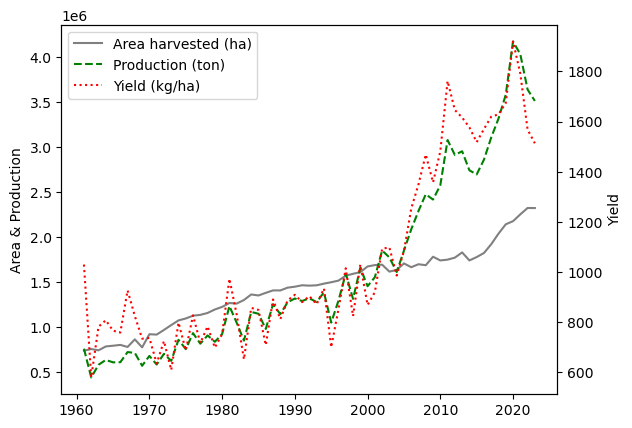

In [9]:
# Improving the plot further
fig, ax1 = plt.subplots()
ax1.plot(dfw.Year, dfw["Area harvested (ha)"], "grey", label="Area harvested (ha)")
ax1.plot(
    dfw.Year, dfw["Production (t)"], "green", linestyle="--", label="Production (ton)"
)
ax1.set_ylabel("Area & Production")

ax2 = ax1.twinx()
ax2.plot(dfw.Year, dfw["Yield (kg/ha)"], "red", linestyle=":", label="Yield (kg/ha)")
ax2.set_ylabel("Yield")

# Combining the two legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.show;

It is obvious that the production sharp increase since 1995 is due to the new technologies that improved the productivity per unit area, not because of the increase in the area. this conclusion was drawn because the area curve is almost steadily increase, but there is an abrupt increase in the yield and production together since 1995.

let's see these relationships closely

In [10]:
# to make labels easier, I will define some variables for them
area = "Area harvested (ha)"
production = "Production (t)"
yields="Yield (kg/ha)"

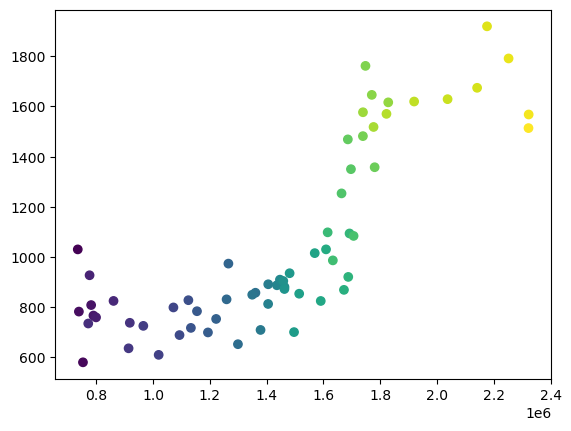

In [11]:
# area vs yield
plt.scatter(x=dfw[area], y=dfw[yields], c=dfw.Year);

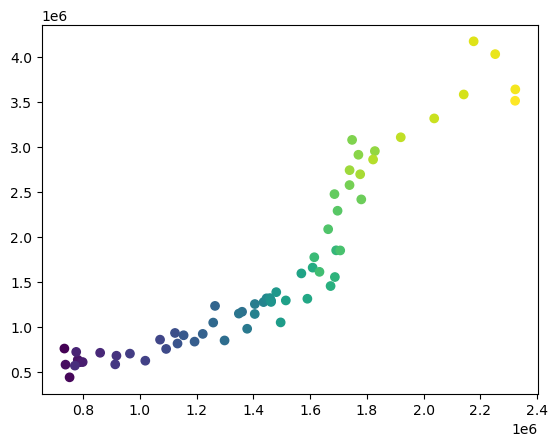

In [12]:
# area vs production
plt.scatter(x=dfw[area], y=dfw[production], c=dfw.Year);

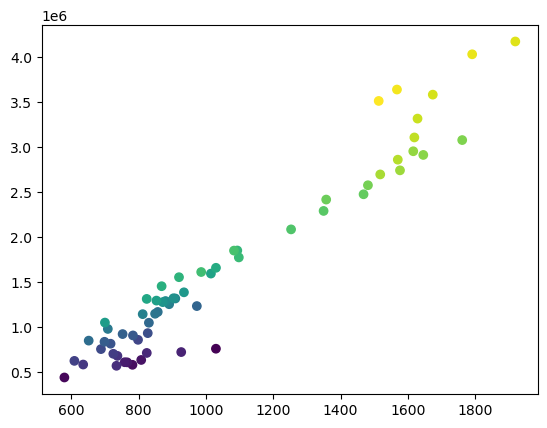

In [13]:
# yield vs production
plt.scatter(x=dfw[yields], y=dfw[production], c=dfw.Year);

It appearc clearly that yield and production  relationship is almost linear, other that the other two.

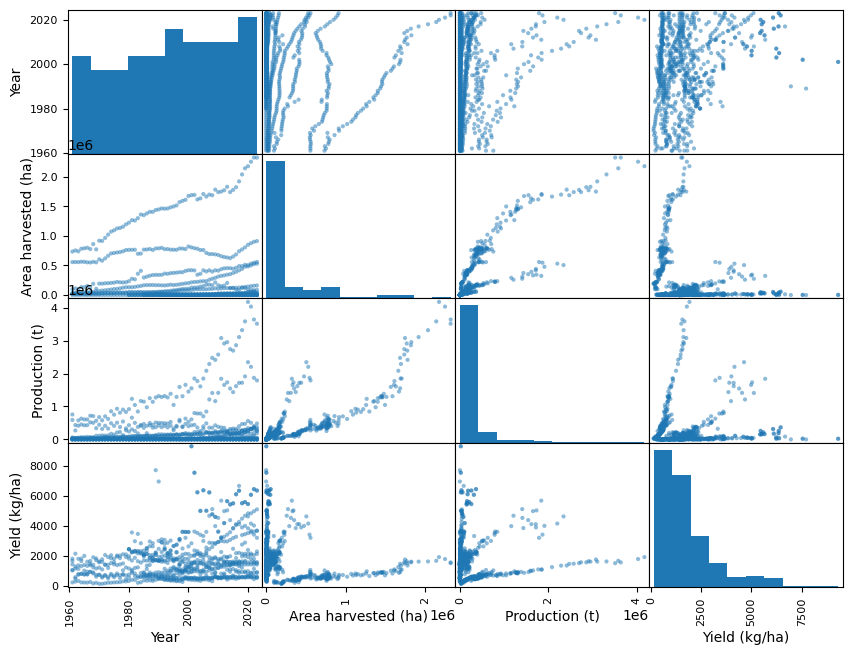

In [14]:
# using pandas
pd.plotting.scatter_matrix(df,figsize=(10,7.5), diagonal = 'hist',);

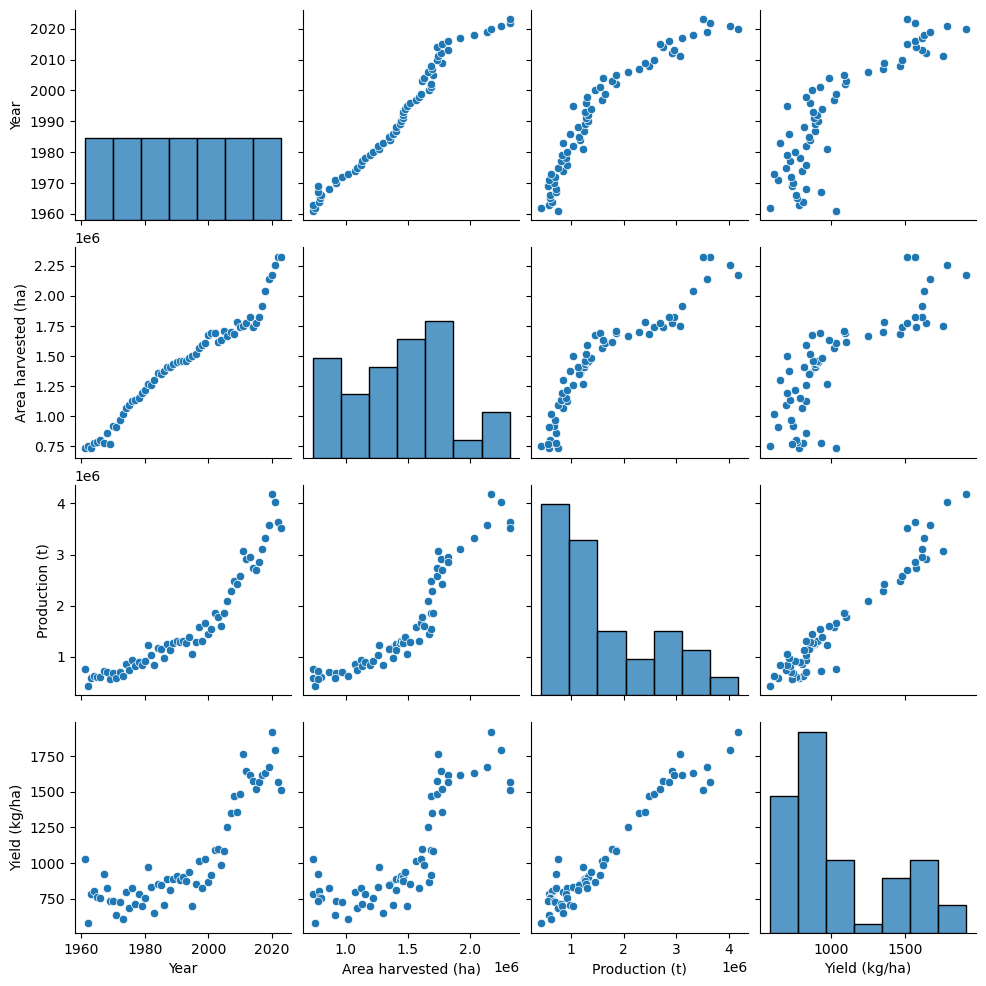

In [15]:
# Using seaborn
sns.pairplot(dfw);

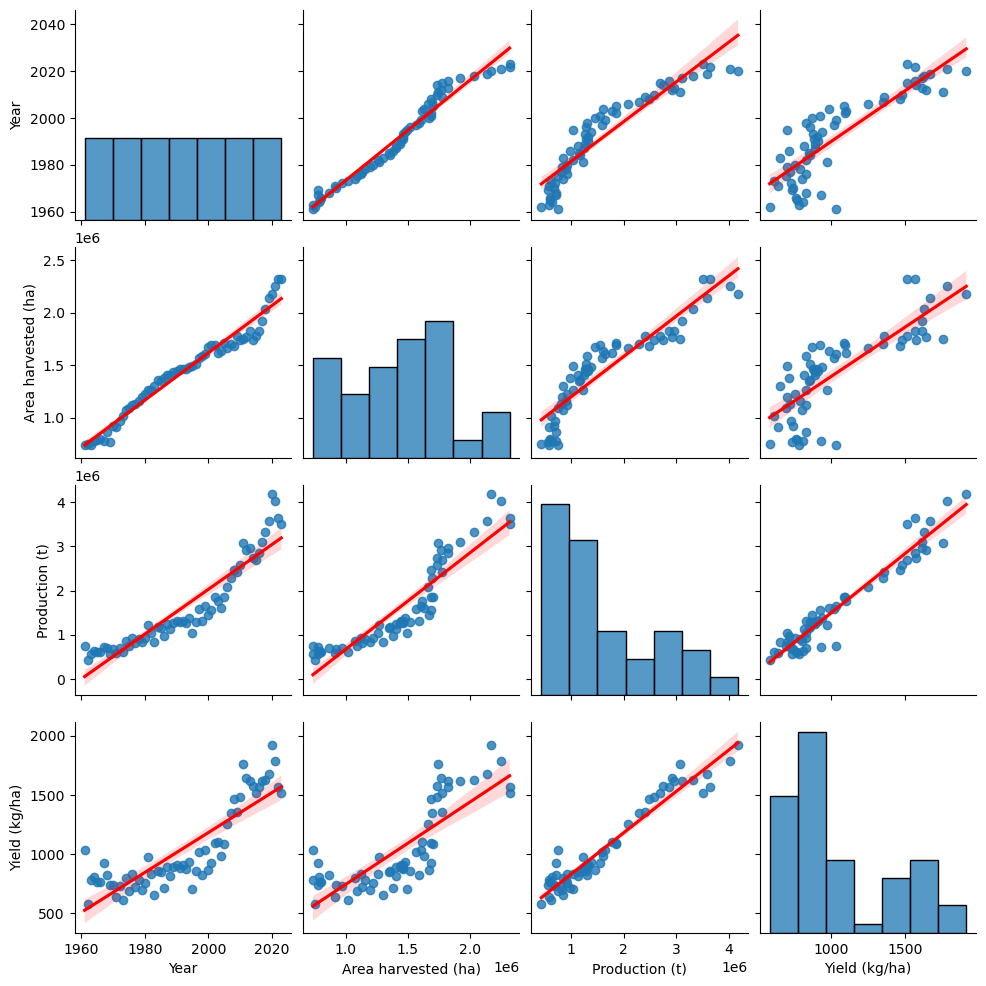

In [16]:
# Using seaborn regression
sns.pairplot(dfw, kind='reg',plot_kws={'line_kws':{'color':'red'}});

In [17]:
# To display regression equations or R²:

def annotate_corr(x,y, ax,**kwargs):
    r=np.corrcoef(x,y)[0,1]
    # ax.plt.gca() # Get current axis
    ax.annotate(f"r= {r:.2f}",xy=(.1,.9), xycoords=ax.transAxes)

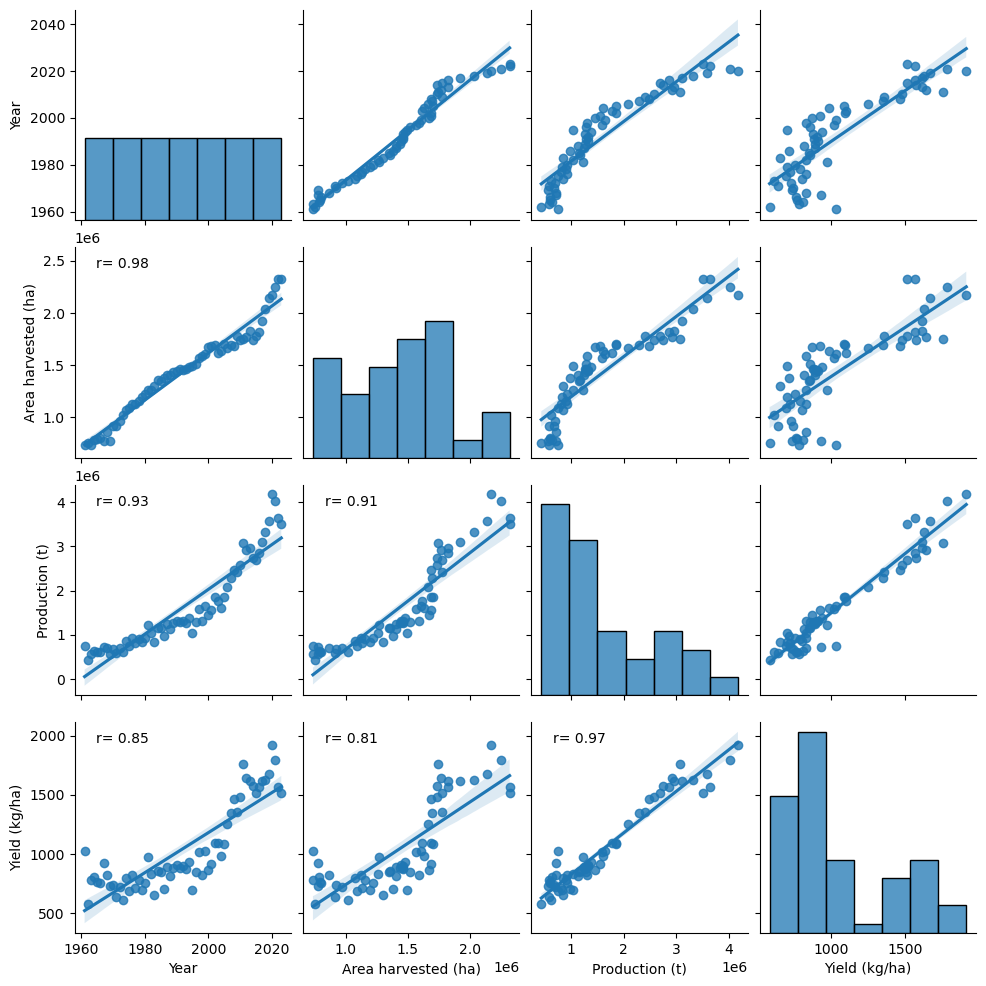

In [18]:
g = sns.pairplot(dfw,kind='reg')
# Loop over axes and manually annotate
for i, j in zip(*np.tril_indices_from(g.axes, -1)):
    ax = g.axes[i, j]
    x = dfw[g.x_vars[j]]
    y = dfw[g.y_vars[i]]
    annotate_corr(x, y, ax=ax)

plt.show()

Exactly as I said, the highest correlation is between production and yield, then area and yield. Also the area havested increase annualy in a linear way

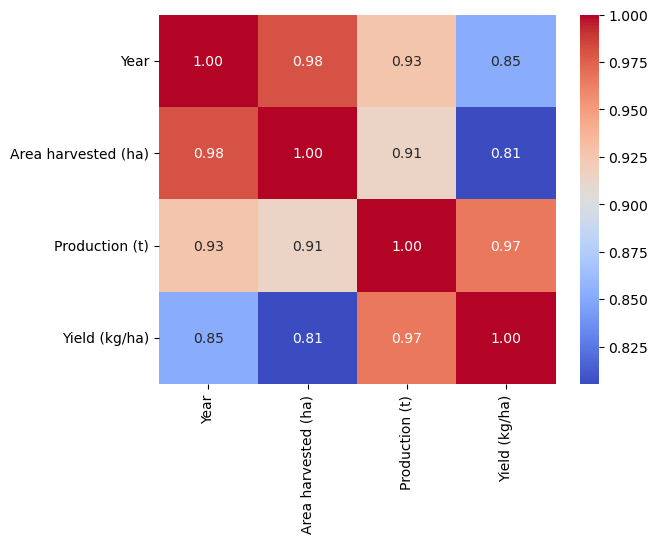

In [19]:
# see a heatmap
sns.heatmap(dfw.corr(), annot=True, cmap='coolwarm', fmt='.2f');

Great!

Let's try another slice of the dataset, not only the world one.